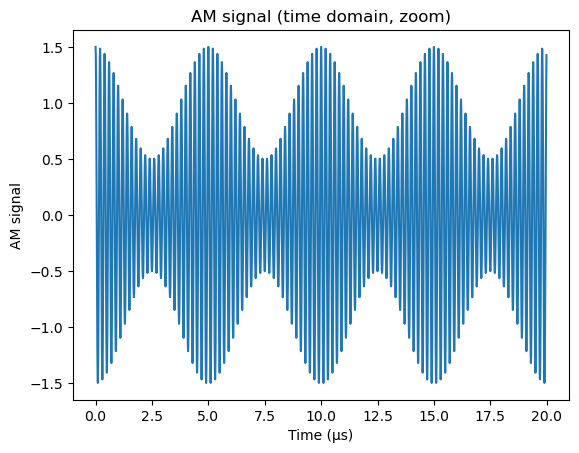

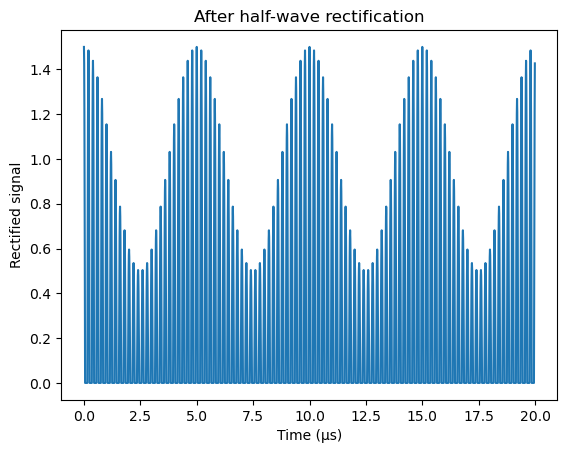

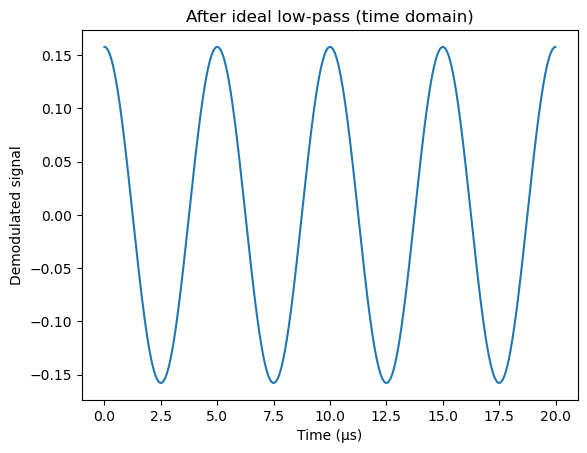

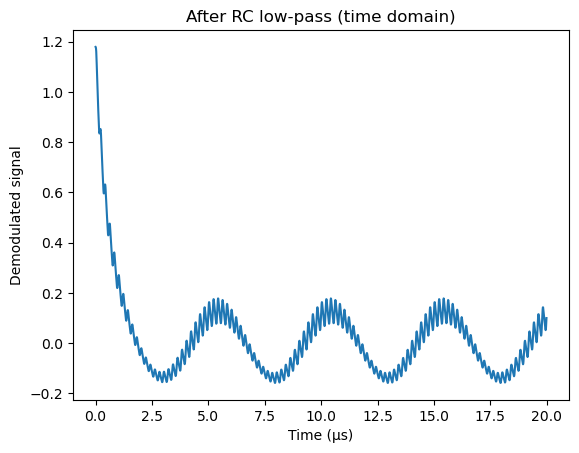

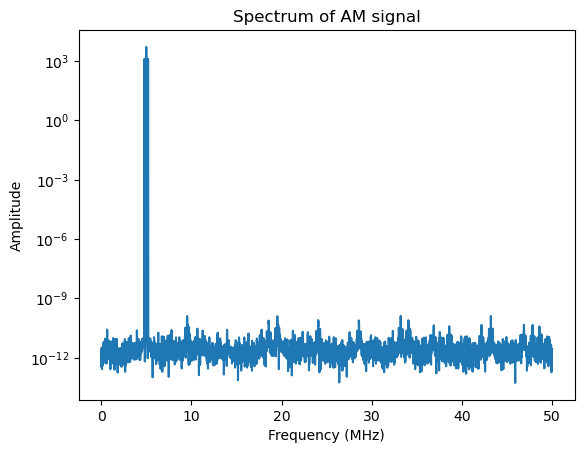

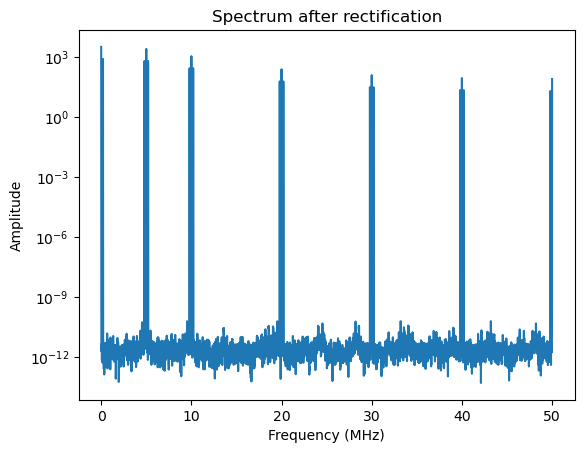

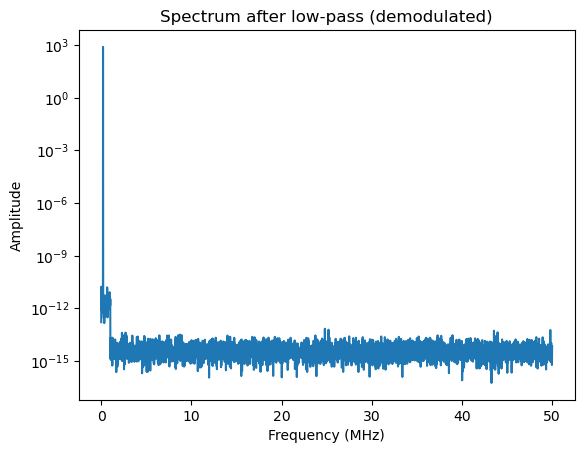

In [14]:
# Visualization of AM demodulation (5a): time signals and spectra
import numpy as np
import matplotlib.pyplot as plt

# Parameters
UT = 1.0
fT = 5e6
fM = 200e3
m  = 0.5

# Sampling
fs   = 100e6
T    = 1/fs
Tobs = 100e-6
N    = int(Tobs * fs)
t    = np.arange(N) * T

# AM signal
x = UT * (1 + m*np.cos(2*np.pi*fM*t)) * np.cos(2*np.pi*fT*t)

# Half-wave rectification
x_rect = np.maximum(x, 0.0)

# FFT helpers
def spectrum(sig):
    X = np.fft.rfft(sig)
    f = np.fft.rfftfreq(len(sig), d=T)
    return f, np.abs(X)

# Ideal low-pass in frequency domain
Xr = np.fft.rfft(x_rect)
f  = np.fft.rfftfreq(N, d=T)
fc = 1e6
H  = (f <= fc).astype(float)
y_lp = np.fft.irfft(Xr * H, n=N)
y_lp -= np.mean(y_lp)

# RC low-pass in time domain
tau = 0.5e-6
alpha = T / (tau + T)
y_rc = np.empty_like(x_rect)
y_rc[0] = x_rect[0]
for n in range(1, N):
    y_rc[n] = y_rc[n-1] + alpha * (x_rect[n] - y_rc[n-1])
y_rc -= np.mean(y_rc)

# Time-domain plots (zoomed)
plt.figure()
plt.plot(t[:2000]*1e6, x[:2000])
plt.xlabel("Time (µs)")
plt.ylabel("AM signal")
plt.title("AM signal (time domain, zoom)")
plt.show()

plt.figure()
plt.plot(t[:2000]*1e6, x_rect[:2000])
plt.xlabel("Time (µs)")
plt.ylabel("Rectified signal")
plt.title("After half-wave rectification")
plt.show()

plt.figure()
plt.plot(t[:2000]*1e6, y_lp[:2000])
plt.xlabel("Time (µs)")
plt.ylabel("Demodulated signal")
plt.title("After ideal low-pass (time domain)")
plt.show()

plt.figure()
plt.plot(t[:2000]*1e6, y_rc[:2000])
plt.xlabel("Time (µs)")
plt.ylabel("Demodulated signal")
plt.title("After RC low-pass (time domain)")
plt.show()

# Frequency-domain plots
f_x, spec_x = spectrum(x)
f_r, spec_r = spectrum(x_rect)
f_lp, spec_lp = spectrum(y_lp)

plt.figure()
plt.semilogy(f_x/1e6, spec_x)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.title("Spectrum of AM signal")
plt.show()

plt.figure()
plt.semilogy(f_r/1e6, spec_r)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.title("Spectrum after rectification")
plt.show()

plt.figure()
plt.semilogy(f_lp/1e6, spec_lp)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.title("Spectrum after low-pass (demodulated)")
plt.show()